<a href="https://colab.research.google.com/github/jiiiisoo/ICT/blob/main/helmet_detection/helmet_detection_1ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import cv2

In [ ]:
!unzip -uq "/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet.zip" -d "/content/drive/MyDrive/deeplearning/final_project"

In [ ]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 195 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_28 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_29 (Bat  (None, 63, 63, 64)     

In [ ]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 42s 3s/step - loss: 3.7690 - accuracy: 0.4513 - val_loss: 0.7273 - val_accuracy: 0.5208
Epoch 2/10
13/13 [==============================] - 39s 3s/step - loss: 2.2983 - accuracy: 0.4821 - val_loss: 0.6419 - val_accuracy: 0.6458
Epoch 3/10
13/13 [==============================] - 39s 3s/step - loss: 1.4981 - accuracy: 0.6103 - val_loss: 1.3553 - val_accuracy: 0.4792
Epoch 4/10
13/13 [==============================] - 39s 3s/step - loss: 1.0737 - accuracy: 0.6359 - val_loss: 1.8380 - val_accuracy: 0.4792
Epoch 5/10
13/13 [==============================] - 39s 3s/step - loss: 0.9410 - accuracy: 0.6718 - val_loss: 2.3223 - val_accuracy: 0.4792
Epoch 6/10
13/13 [==============================] - 41s 3s/step - loss: 0.8023 - accuracy: 0.7128 - val_loss: 2.1540 - val_accuracy: 0.4792
Epoch 7/10
13/13 [==============================] - 42s 3s/step - loss: 1.0204 - accuracy: 0.6615 - val_loss: 2.5309 - val_accuracy: 0.4792
Epoch 8/10
13/13 [=============

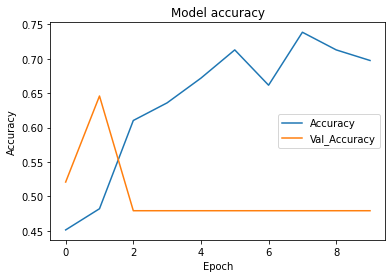

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#dense 수 줄이고 실행
# Fitting the neural network to the training set
history_2 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 40s 3s/step - loss: 2.7877 - accuracy: 0.7282 - val_loss: 3.2408 - val_accuracy: 0.4792
Epoch 2/10
13/13 [==============================] - 39s 3s/step - loss: 2.9903 - accuracy: 0.7846 - val_loss: 3.0209 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 39s 3s/step - loss: 1.8179 - accuracy: 0.8564 - val_loss: 5.5813 - val_accuracy: 0.4792
Epoch 4/10
13/13 [==============================] - 39s 3s/step - loss: 2.5475 - accuracy: 0.8256 - val_loss: 8.1914 - val_accuracy: 0.4792
Epoch 5/10
13/13 [==============================] - 40s 3s/step - loss: 3.3443 - accuracy: 0.8103 - val_loss: 7.2003 - val_accuracy: 0.6042
Epoch 6/10
13/13 [==============================] - 39s 3s/step - loss: 0.7033 - accuracy: 0.9128 - val_loss: 13.8974 - val_accuracy: 0.4792
Epoch 7/10
13/13 [==============================] - 40s 3s/step - loss: 1.6312 - accuracy: 0.8667 - val_loss: 9.4494 - val_accuracy: 0.5000
Epoch 8/10
13/13 [============

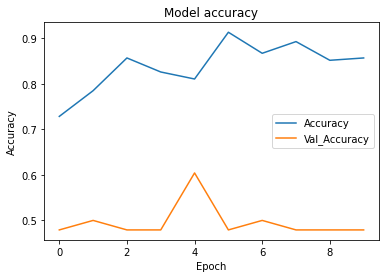

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 3,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 3,
                                           subset='validation')

Found 195 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
#epoch size 줄이고 실행
# Fitting the neural network to the training set
history_3 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10
65/65 [==============================] - 44s 665ms/step - loss: 3.0494 - accuracy: 0.8359 - val_loss: 11.0256 - val_accuracy: 0.5833
Epoch 2/10
65/65 [==============================] - 40s 618ms/step - loss: 5.0647 - accuracy: 0.7487 - val_loss: 5.4131 - val_accuracy: 0.6875
Epoch 3/10
65/65 [==============================] - 40s 630ms/step - loss: 4.1100 - accuracy: 0.8103 - val_loss: 3.8438 - val_accuracy: 0.7917
Epoch 4/10
65/65 [==============================] - 40s 622ms/step - loss: 1.9754 - accuracy: 0.8615 - val_loss: 6.1537 - val_accuracy: 0.7292
Epoch 5/10
65/65 [==============================] - 41s 632ms/step - loss: 2.3501 - accuracy: 0.8359 - val_loss: 0.8653 - val_accuracy: 0.8958
Epoch 6/10
65/65 [==============================] - 40s 610ms/step - loss: 2.2639 - accuracy: 0.8513 - val_loss: 1.9801 - val_accuracy: 0.7917
Epoch 7/10
65/65 [==============================] - 41s 631ms/step - loss: 1.8789 - accuracy: 0.8615 - val_loss: 3.7816 - val_accuracy: 0.791

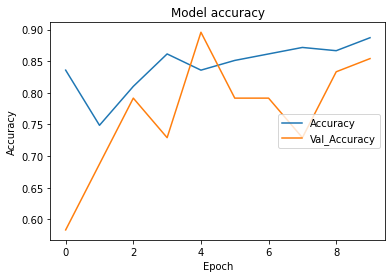

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

In [ ]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#model은 처음과 같이, batch size만 줄여서 진행
# Fitting the neural network to the training set
history_4 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 44s 669ms/step - loss: 5.6798 - accuracy: 0.5231 - val_loss: 0.9919 - val_accuracy: 0.4792
Epoch 2/10
65/65 [==============================] - 40s 625ms/step - loss: 2.6865 - accuracy: 0.5590 - val_loss: 10.2293 - val_accuracy: 0.4792
Epoch 3/10
65/65 [==============================] - 44s 684ms/step - loss: 2.3162 - accuracy: 0.6359 - val_loss: 31.2806 - val_accuracy: 0.4792
Epoch 4/10
65/65 [==============================] - 41s 623ms/step - loss: 2.1556 - accuracy: 0.6718 - val_loss: 30.5916 - val_accuracy: 0.4792
Epoch 5/10
65/65 [==============================] - 42s 651ms/step - loss: 2.1091 - accuracy: 0.6718 - val_loss: 17.4397 - val_accuracy: 0.4792
Epoch 6/10
65/65 [==============================] - 47s 725ms/step - loss: 2.3525 - accuracy: 0.6462 - val_loss: 5.8535 - val_accuracy: 0.4792
Epoch 7/10
65/65 [==============================] - 41s 620ms/step - loss: 1.1766 - accuracy: 0.7590 - val_loss: 14.9414 - val_accuracy: 0.4792
Epoch

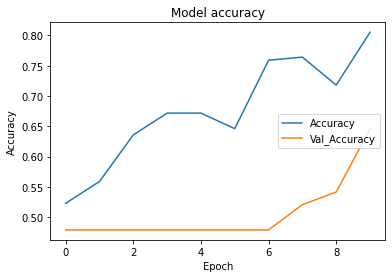

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

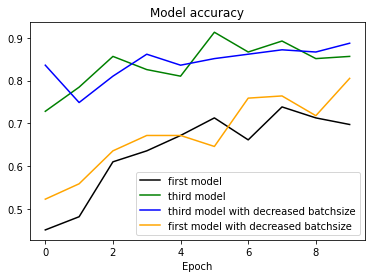

In [ ]:
plt.plot(history.history['accuracy'], color='black', label='first model')
plt.plot(history_2.history['accuracy'], color='green', label='third model')
plt.plot(history_3.history['accuracy'], color='blue', label='third model with decreased batchsize')
plt.plot(history_4.history['accuracy'], color='orange', label='first model with decreased batchsize')
plt.xlabel('Epoch')
plt.title('Model accuracy')
plt.legend()
plt.show()

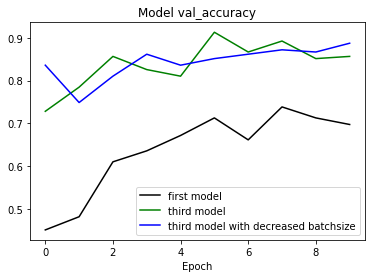

In [ ]:
plt.plot(history.history['accuracy'], color='black', label='first model')
plt.plot(history_2.history['accuracy'], color='green', label='third model')
plt.plot(history_3.history['accuracy'], color='blue', label='third model with decreased batchsize')
plt.xlabel('Epoch')
plt.title('Model val_accuracy')
plt.legend()
plt.show()

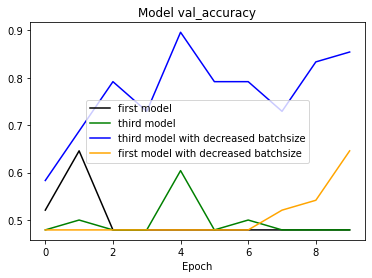

In [ ]:
plt.plot(history.history['val_accuracy'], color='black', label='first model')
plt.plot(history_2.history['val_accuracy'], color='green', label='third model')
plt.plot(history_3.history['val_accuracy'], color='blue', label='third model with decreased batchsize')
plt.plot(history_4.history['val_accuracy'], color='orange', label='first model with decreased batchsize')
plt.xlabel('Epoch')
plt.title('Model val_accuracy')
plt.legend()
plt.show()

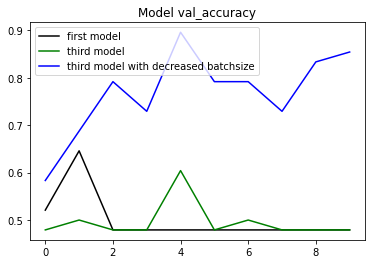

In [ ]:
plt.plot(history.history['val_accuracy'], color='black', label='first model')
plt.plot(history_2.history['val_accuracy'], color='green', label='third model')
plt.plot(history_3.history['val_accuracy'], color='blue', label='third model with decreased batchsize')
plt.title('Model val_accuracy')
plt.legend()
plt.show()

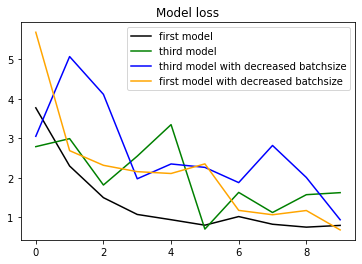

In [ ]:
plt.plot(history.history['loss'], color='black', label='first model')
plt.plot(history_2.history['loss'], color='green', label='third model')
plt.plot(history_3.history['loss'], color='blue', label='third model with decreased batchsize')
plt.plot(history_4.history['loss'], color='orange', label='first model with decreased batchsize')
plt.title('Model loss')
plt.legend()
plt.show()

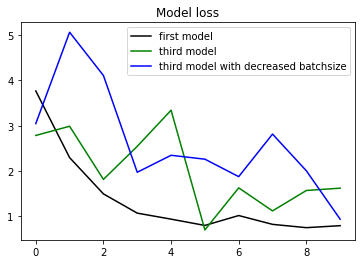

In [ ]:
plt.plot(history.history['loss'], color='black', label='first model')
plt.plot(history_2.history['loss'], color='green', label='third model')
plt.plot(history_3.history['loss'], color='blue', label='third model with decreased batchsize')
plt.title('Model loss')
plt.legend()
plt.show()